# House Price Advance Regression Techniques
# By : Md Ismail Quraishi
# Type : Regression

# Description :
* Ask a home buyer to describe their dream house, and they probably won't begin with the height of the basement ceiling or the proximity to an east-west railroad. But this playground competition's dataset proves that much more influences price negotiations than the number of bedrooms or a white-picket fence.
*
With 79 explanatory variables describing (almost) every aspect of residential homes in Ames, Iowa, this competition challenges you to predict the final price of each home.

In [1]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# Load the datasets
path_train = 'data/train.csv'
path_test = 'data/test.csv'
path_train= "/content/drive/MyDrive/MyProjects/ML Projects/Supervised ML/HousePriceAdvanceRegressionTechniquesKaggle/data/train.csv"
path_test= "/content/drive/MyDrive/MyProjects/ML Projects/Supervised ML/HousePriceAdvanceRegressionTechniquesKaggle/data/test.csv"
df_train = pd.read_csv(path_train)
df_test = pd.read_csv(path_test)

In [4]:
# First view
pd.set_option('display.max_rows',None) # For displaying entire rows
pd.set_option('display.max_columns',None) # For displaying entire columns
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
# Print basic details of the dataset
print('Shape :', df_train.shape)
print('Duplicate rows :',df_train.duplicated().sum())
print()
print('columns :',list(df_train.columns))
print()
print('Null count :')
print(df_train.isna().sum())
print()
print('Unique count :')
print(df_train.nunique())

Shape : (1460, 81)
Duplicate rows : 0

columns : ['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch',

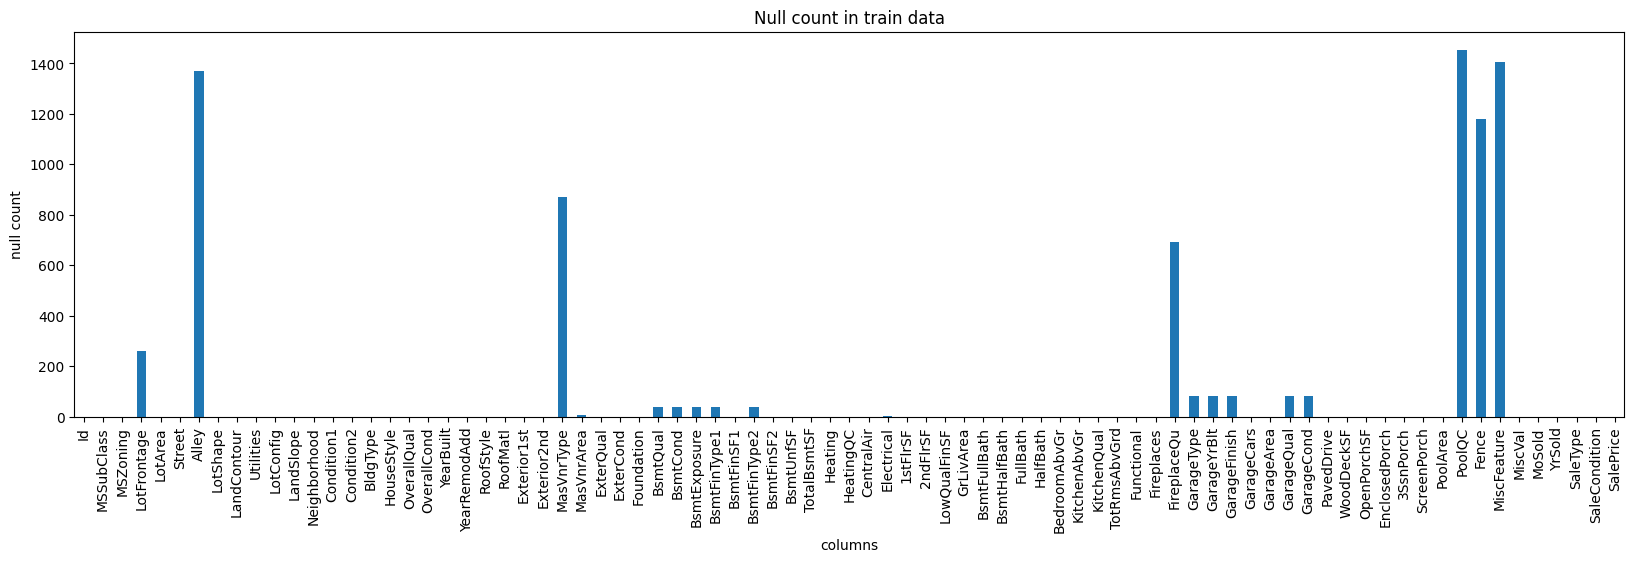

In [6]:
# Null visualization of train data
df_train.isna().sum().plot.bar(figsize=(20,5))
plt.title('Null count in train data')
plt.xlabel('columns')
plt.ylabel('null count')
plt.show()

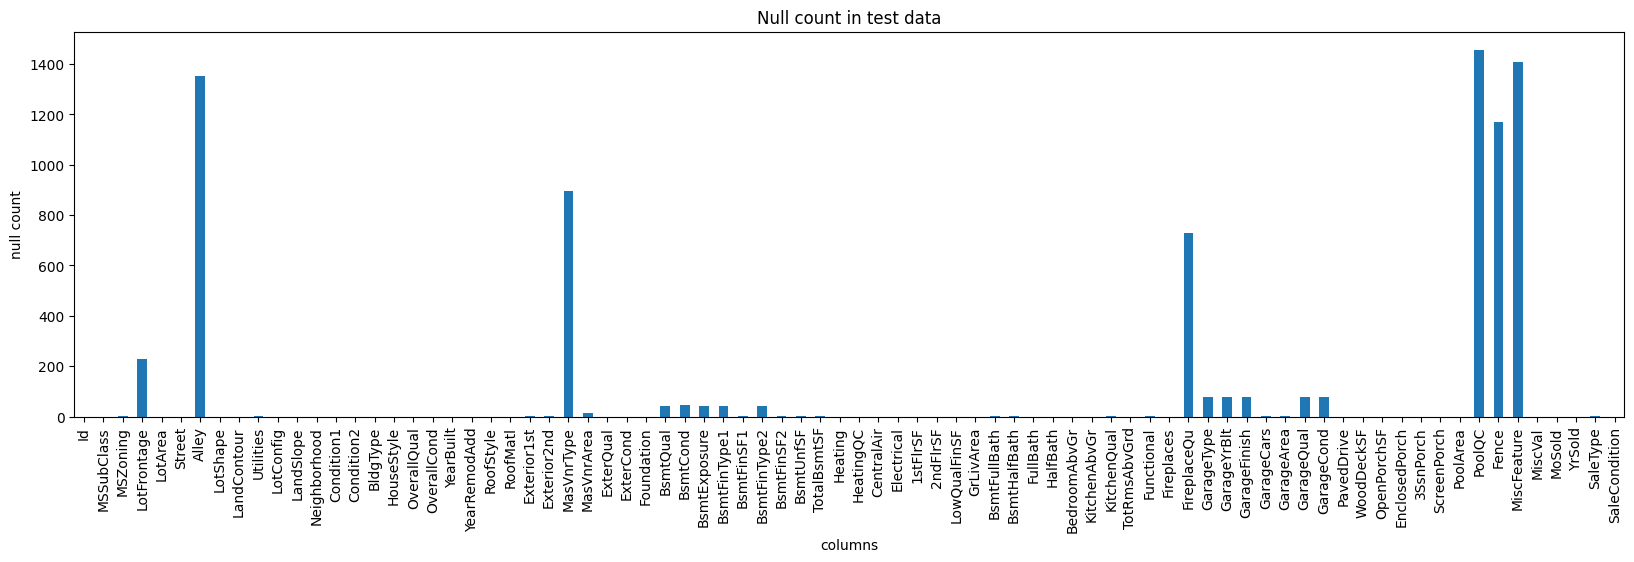

In [7]:
# Null visualization of test data
df_test.isna().sum().plot.bar(figsize=(20,5))
plt.title('Null count in test data')
plt.xlabel('columns')
plt.ylabel('null count')
plt.show()

In [8]:
# Info
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [9]:
# Describe
df_train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


Difference between mean and median in MasVnrArea,BsmtFinSF2, 2ndFlrSF, LowQualFinSF, WoodDeckSF, OpenPorchSF, EnclosedPorch, ScreenPorch, MiscVal are very high. There are high chance of outliers.

## EDA

In [10]:
df_copy = df_train.copy() # Making copy of the dataset
# Function to handle null values
def null_imputation(df, cols, typ='num'):
    '''
    Input: df, cols, typ
    '''
    try: # exception handling
        if typ == 'num': # code for numeric columns
            for col in cols:
                result = df[col].fillna(df[col].quantile(.50)) # filling numerical nulls with median because median is not biased toward outliers.
                df[col] = result
        elif typ == 'cat': # code for categorical columns
            for col in cols:
                top = df[col].describe()['top']
                result = df[col].fillna(top) # filling with top
                df[col] = result
        else:
            print('Enter valid informations!')
    except: # exception handling
        print('Exception incounterred please check type of the input columns')

# Function for preprocessing data to make ready for eda
def preprocessingOne(df):
    '''
    Input: df
    '''
    high_null_cols= df.isna().sum()[(df.isna().sum() > 500) & (df.isna().sum() > 0)].index # columns with high nulls
    less_null_cols= df.isna().sum()[(df.isna().sum() < 500) & (df.isna().sum() > 0)].index # columns with low nulls
    numeric_nulls = df[less_null_cols].describe().columns # columns with less null and numerical values
    categorical_nulls = list(set(less_null_cols) - set(numeric_nulls)) # columns with less null and categorical values
    df.drop(high_null_cols,axis=1, inplace=True) # drop columns with more than 50% nulls
    null_imputation(df, cols=numeric_nulls, typ='num') # Imputing null for numerical columns with median
    null_imputation(df, cols=categorical_nulls, typ='cat') # Imputing null for categorical columns with mod
    print('data preprocessed successfully!')
    return df

def preprocessingTwo(df):
  # cols_to_drop = ['Id', 'LotConfig', 'LandSlope', 'BsmtFinType1', 'BsmtFinType2', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea',
  #                 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', 'ScreenPorch', 'HouseStyle', 'OverallQual', 'YearRemodAdd', 'RoofStyle',
  #               'Exterior2nd', 'BsmtQual', 'Heating', 'GarageYrBlt', 'GarageCars','GarageFinish','GarageQual']

  cols_to_drop = ['Id', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea',
                  'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', 'ScreenPorch', 'GarageArea']
  df['totalArea'] = df['TotalBsmtSF'] + df['1stFlrSF'] + df['2ndFlrSF']+df['GrLivArea']+df['GarageArea'] # Feature Manipulation
  df['totalPorchArea'] = df['WoodDeckSF'] + df['OpenPorchSF'] + df['EnclosedPorch'] + df['ScreenPorch'] # Feature Manipulation
  df.drop(cols_to_drop, axis=1, inplace=True) # drop unwanted columns
  return df

def preprocessingThree(df):
  df = preprocessingOne(df)
  df = preprocessingTwo(df)
  # df = pd.get_dummies(df, columns=df.describe(include='object').columns, drop_first=True, dtype=int) # Encoding categorical variables
  return df

df_copy = preprocessingOne(df_copy.copy()) # making df ready for eda

data preprocessed successfully!


In [11]:
def plotsubs(col, row):
  sns.histplot(df_copy[col], kde=True, ax=ax[row,0])
  sns.histplot(np.log(df_copy[col]+1), kde=True, ax=ax[row,1])
  ax[row,0].set_title(f'{col} before log transformation')
  ax[row,1].set_title(f'{col} after log transformation')
  ax[row,0].set_xlabel('')
  ax[row,1].set_xlabel('')

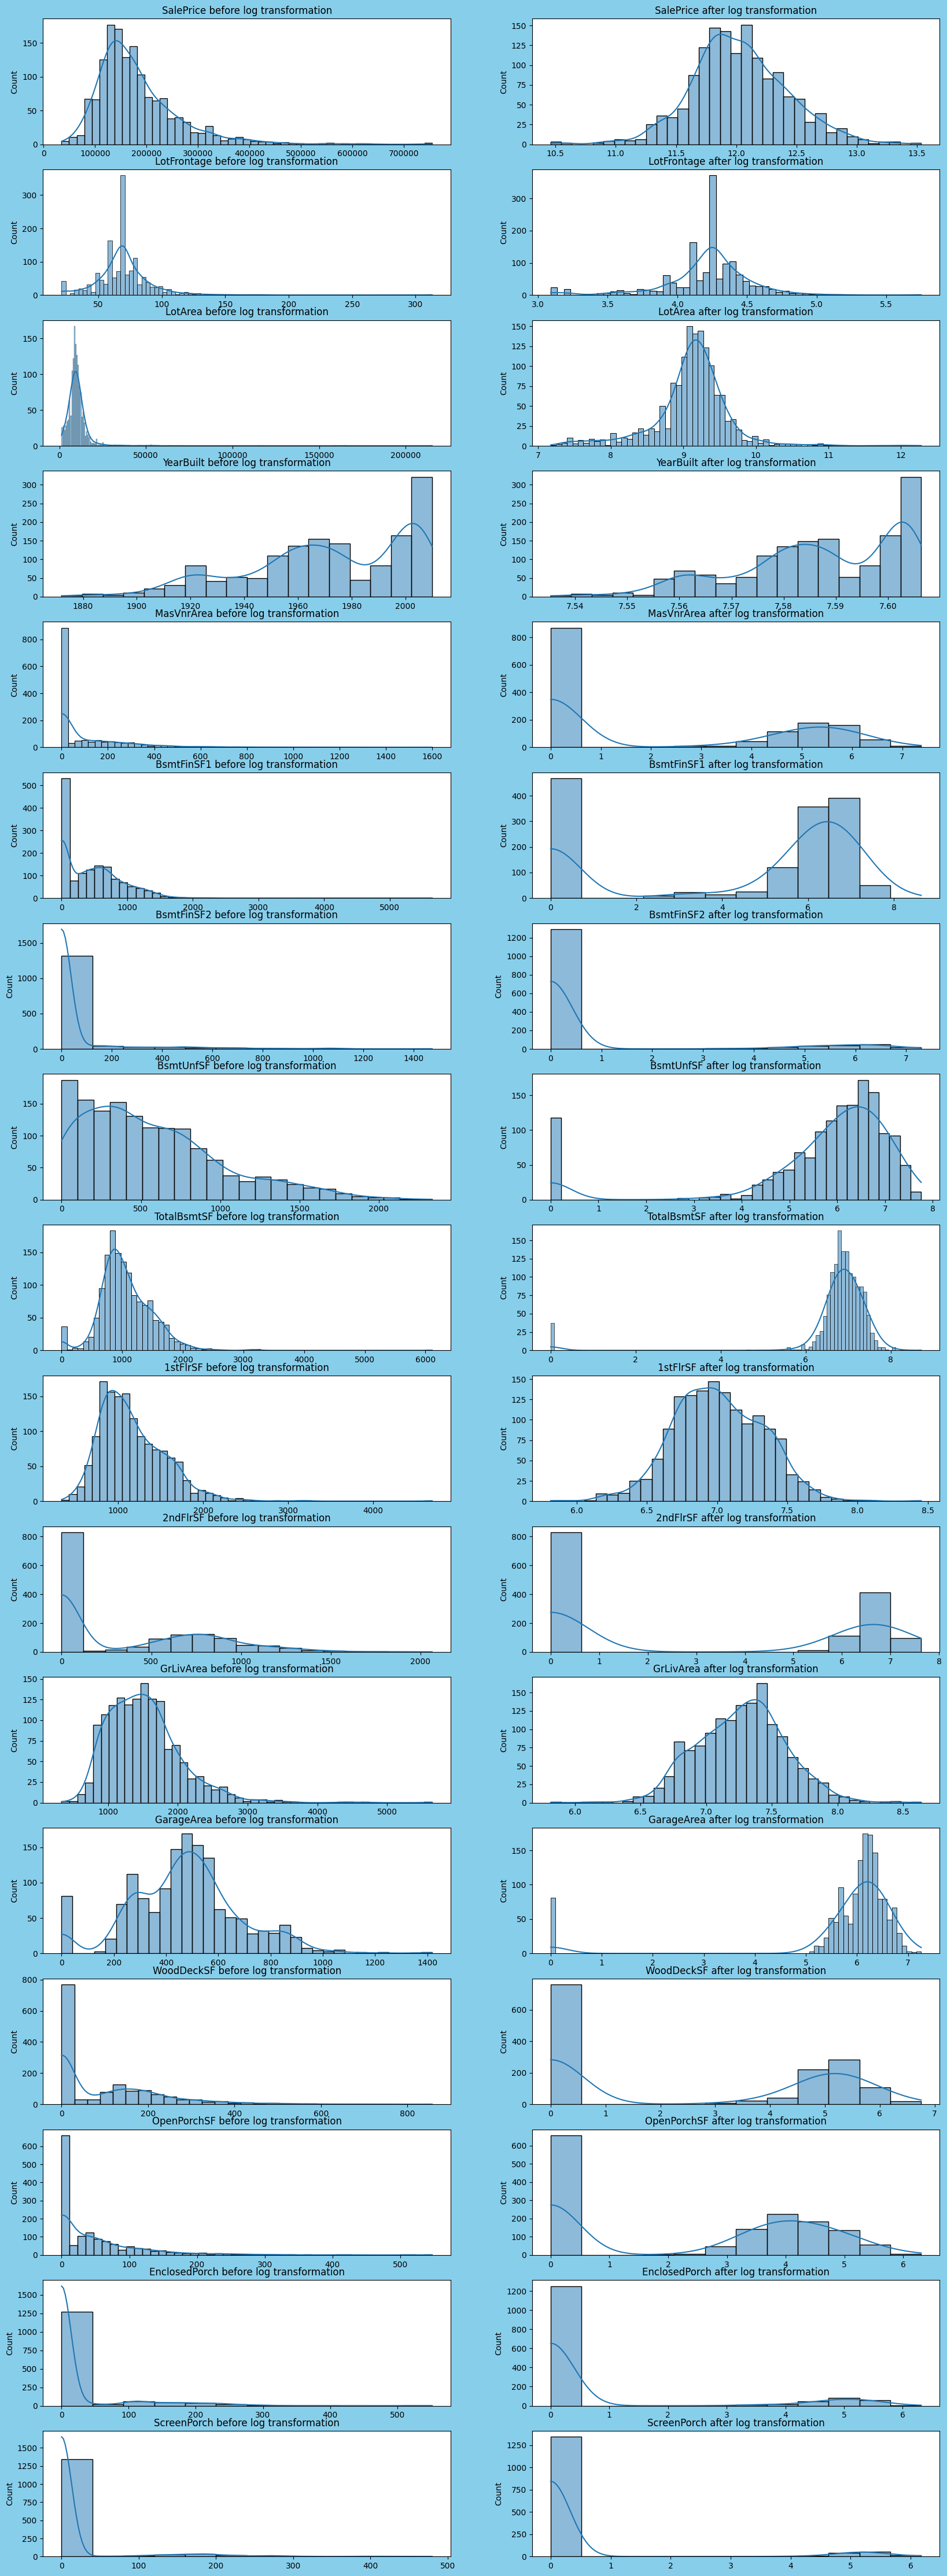

In [12]:
fig,ax = plt.subplots(ncols=2, nrows=17, figsize=(20,57), facecolor='skyblue')
plotsubs('SalePrice', 0)
plotsubs('LotFrontage', 1)
plotsubs('LotArea', 2)
plotsubs('YearBuilt', 3)
plotsubs('MasVnrArea', 4)
plotsubs('BsmtFinSF1', 5)
plotsubs('BsmtFinSF2', 6)
plotsubs('BsmtUnfSF', 7)
plotsubs('TotalBsmtSF', 8)
plotsubs('1stFlrSF', 9)
plotsubs('2ndFlrSF', 10)
plotsubs('GrLivArea', 11)
plotsubs('GarageArea', 12)
plotsubs('WoodDeckSF', 13)
plotsubs('OpenPorchSF', 14)
plotsubs('EnclosedPorch', 15)
plotsubs('ScreenPorch', 16)
plt.show()

There are some features we need to do log transformation to make them closer to normal distributions like : 'SalePrice', 'LotFrontage', 'LotArea', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GarageArea', 'WoodDeckSF'

In [13]:
cols_for_log_trans = ['SalePrice', 'LotFrontage', 'LotArea', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GarageArea', 'WoodDeckSF']

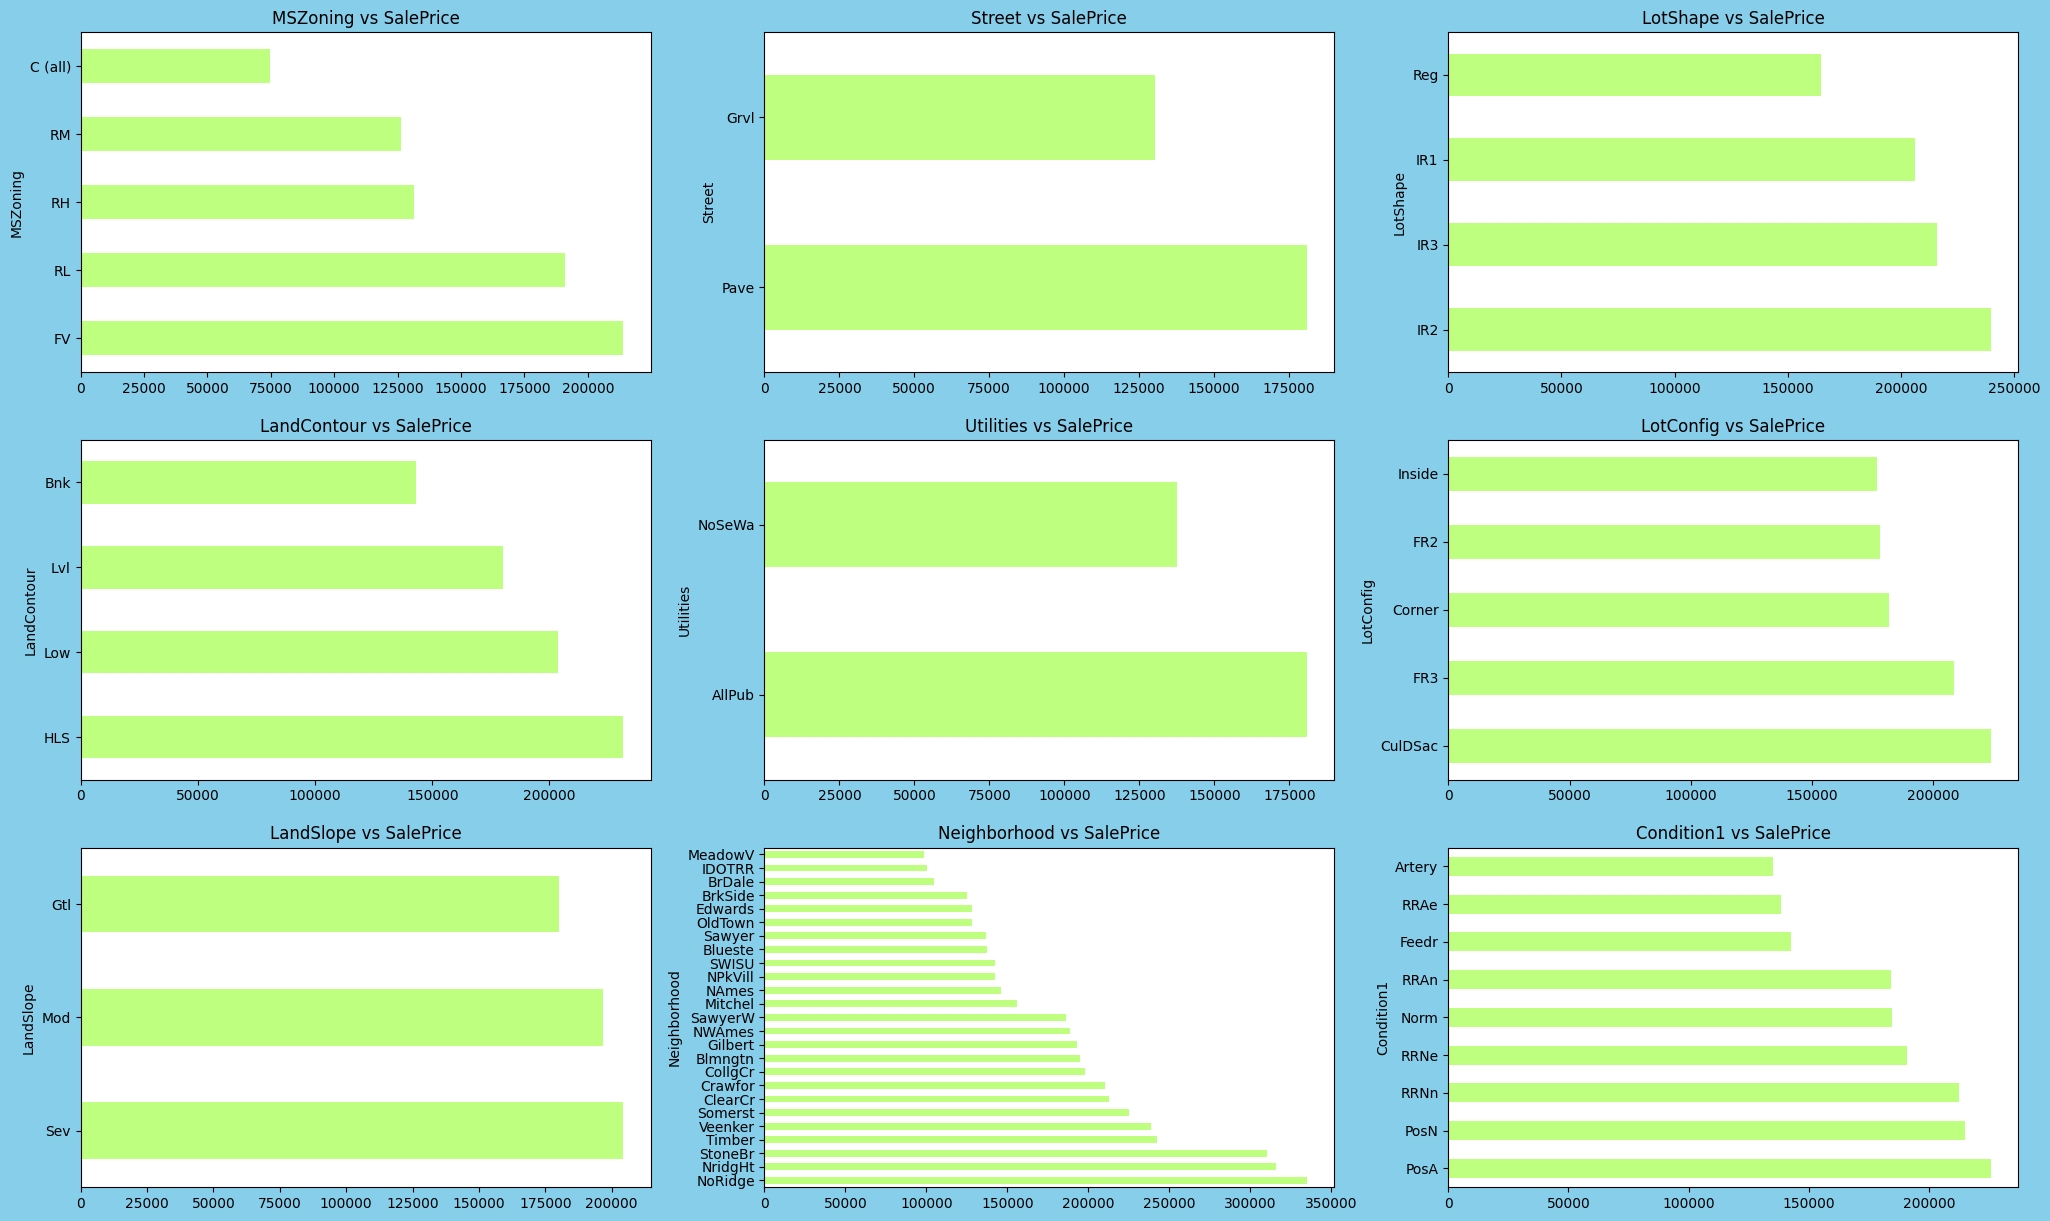

In [14]:
categorical_columns = df_copy.describe(include='object').columns
def plot_fig(cols, row):
  color = '#bfff80'
  df_copy.groupby([cols[0]])['SalePrice'].mean().sort_values(ascending=False).plot.barh(color=color, ax=ax[row,0])
  df_copy.groupby([cols[1]])['SalePrice'].mean().sort_values(ascending=False).plot.barh(color=color, ax=ax[row,1])
  df_copy.groupby([cols[2]])['SalePrice'].mean().sort_values(ascending=False).plot.barh(color=color, ax=ax[row,2])
  ax[row,0].set_title(f'{cols[0]} vs SalePrice')
  ax[row,1].set_title(f'{cols[1]} vs SalePrice')
  ax[row,2].set_title(f'{cols[2]} vs SalePrice')

fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(25,15), facecolor='skyblue')
plot_fig(categorical_columns[0:3],0)
plot_fig(categorical_columns[3:6],1)
plot_fig(categorical_columns[6:9],2)
plt.show()

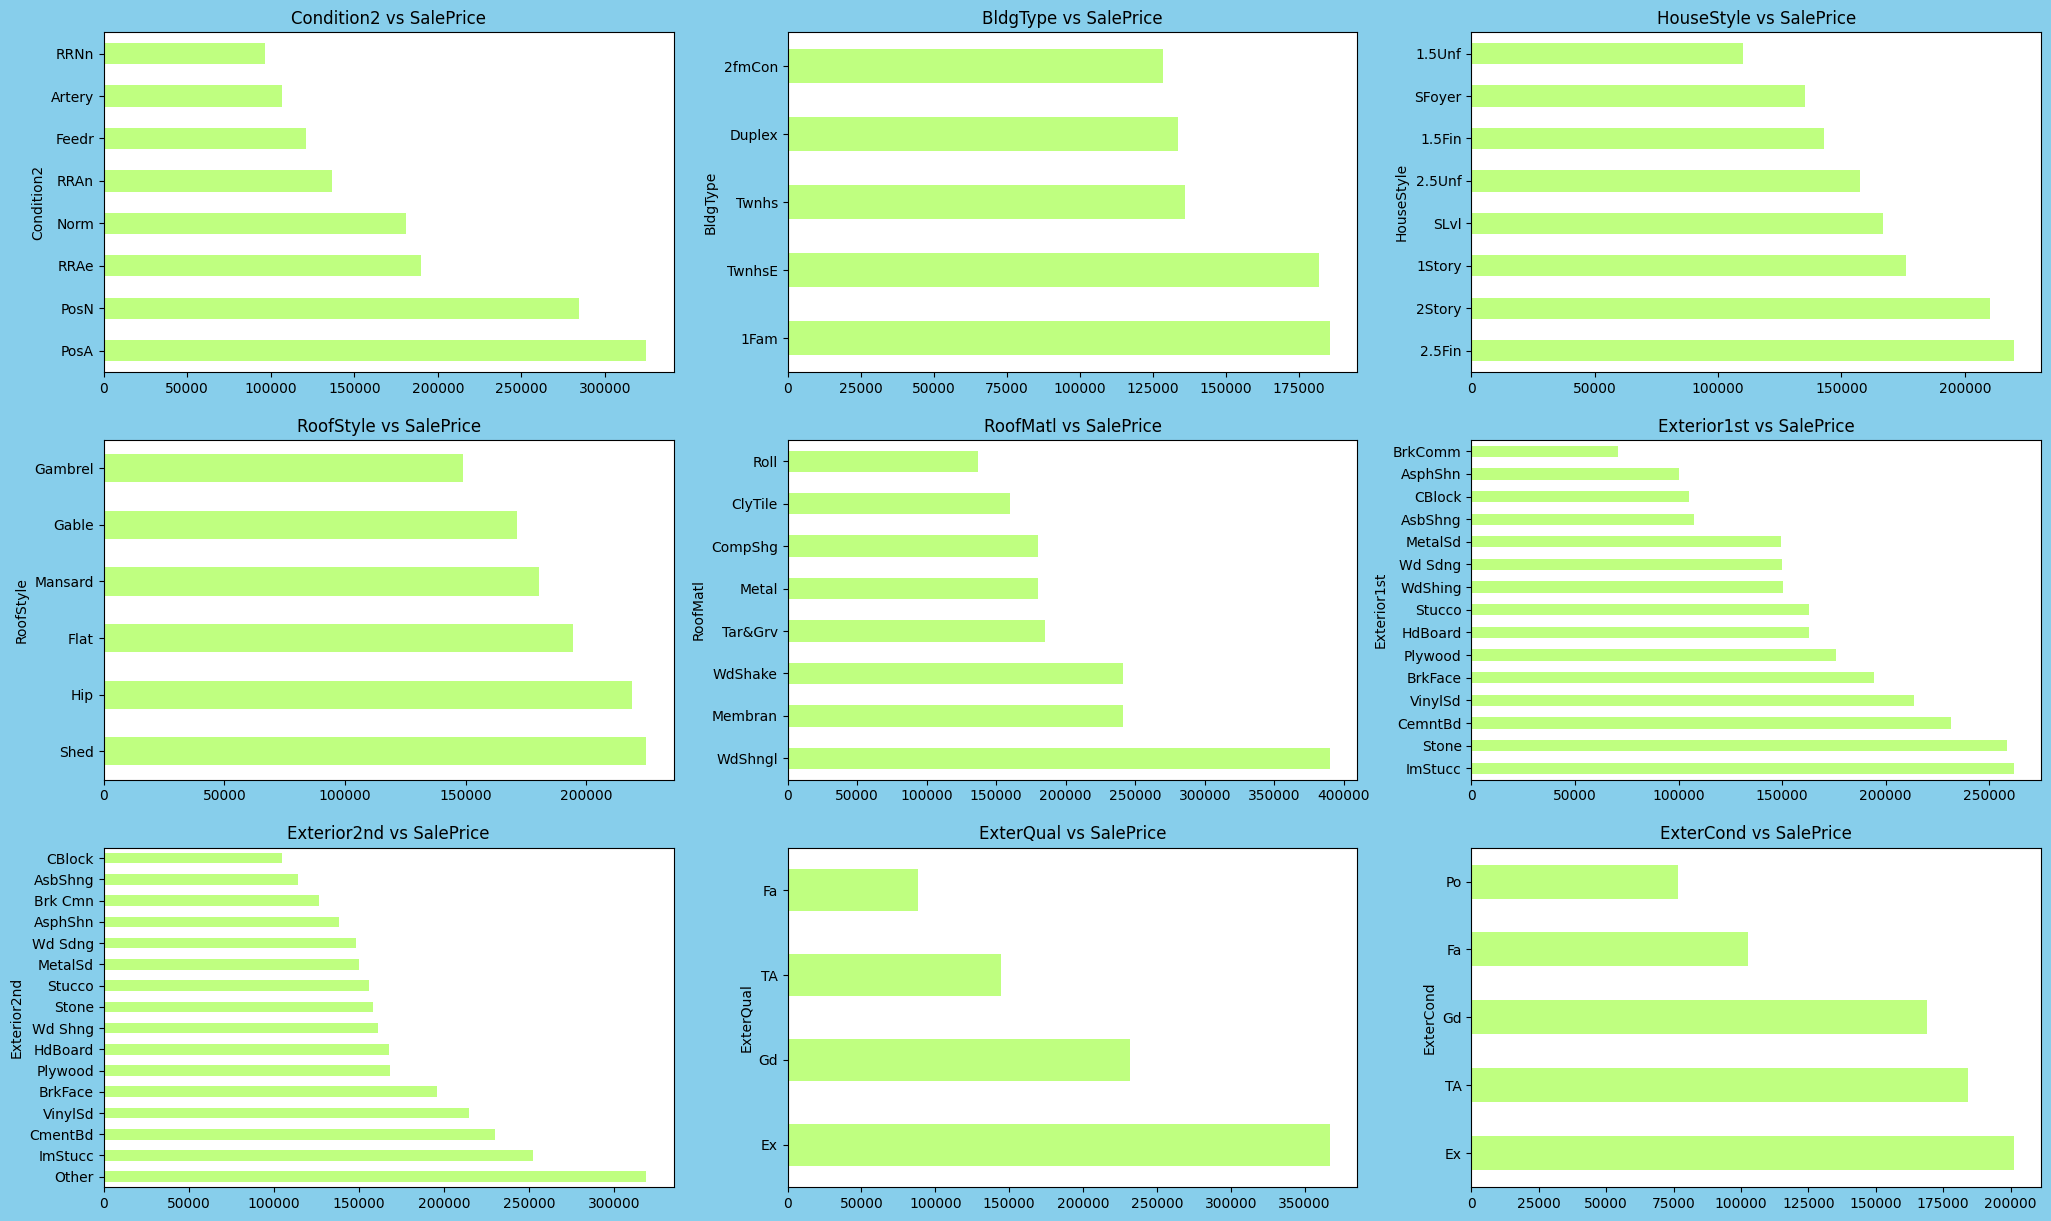

In [15]:
fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(25,15), facecolor='skyblue')
plot_fig(categorical_columns[9:12],0)
plot_fig(categorical_columns[12:15],1)
plot_fig(categorical_columns[15:18],2)
plt.show()

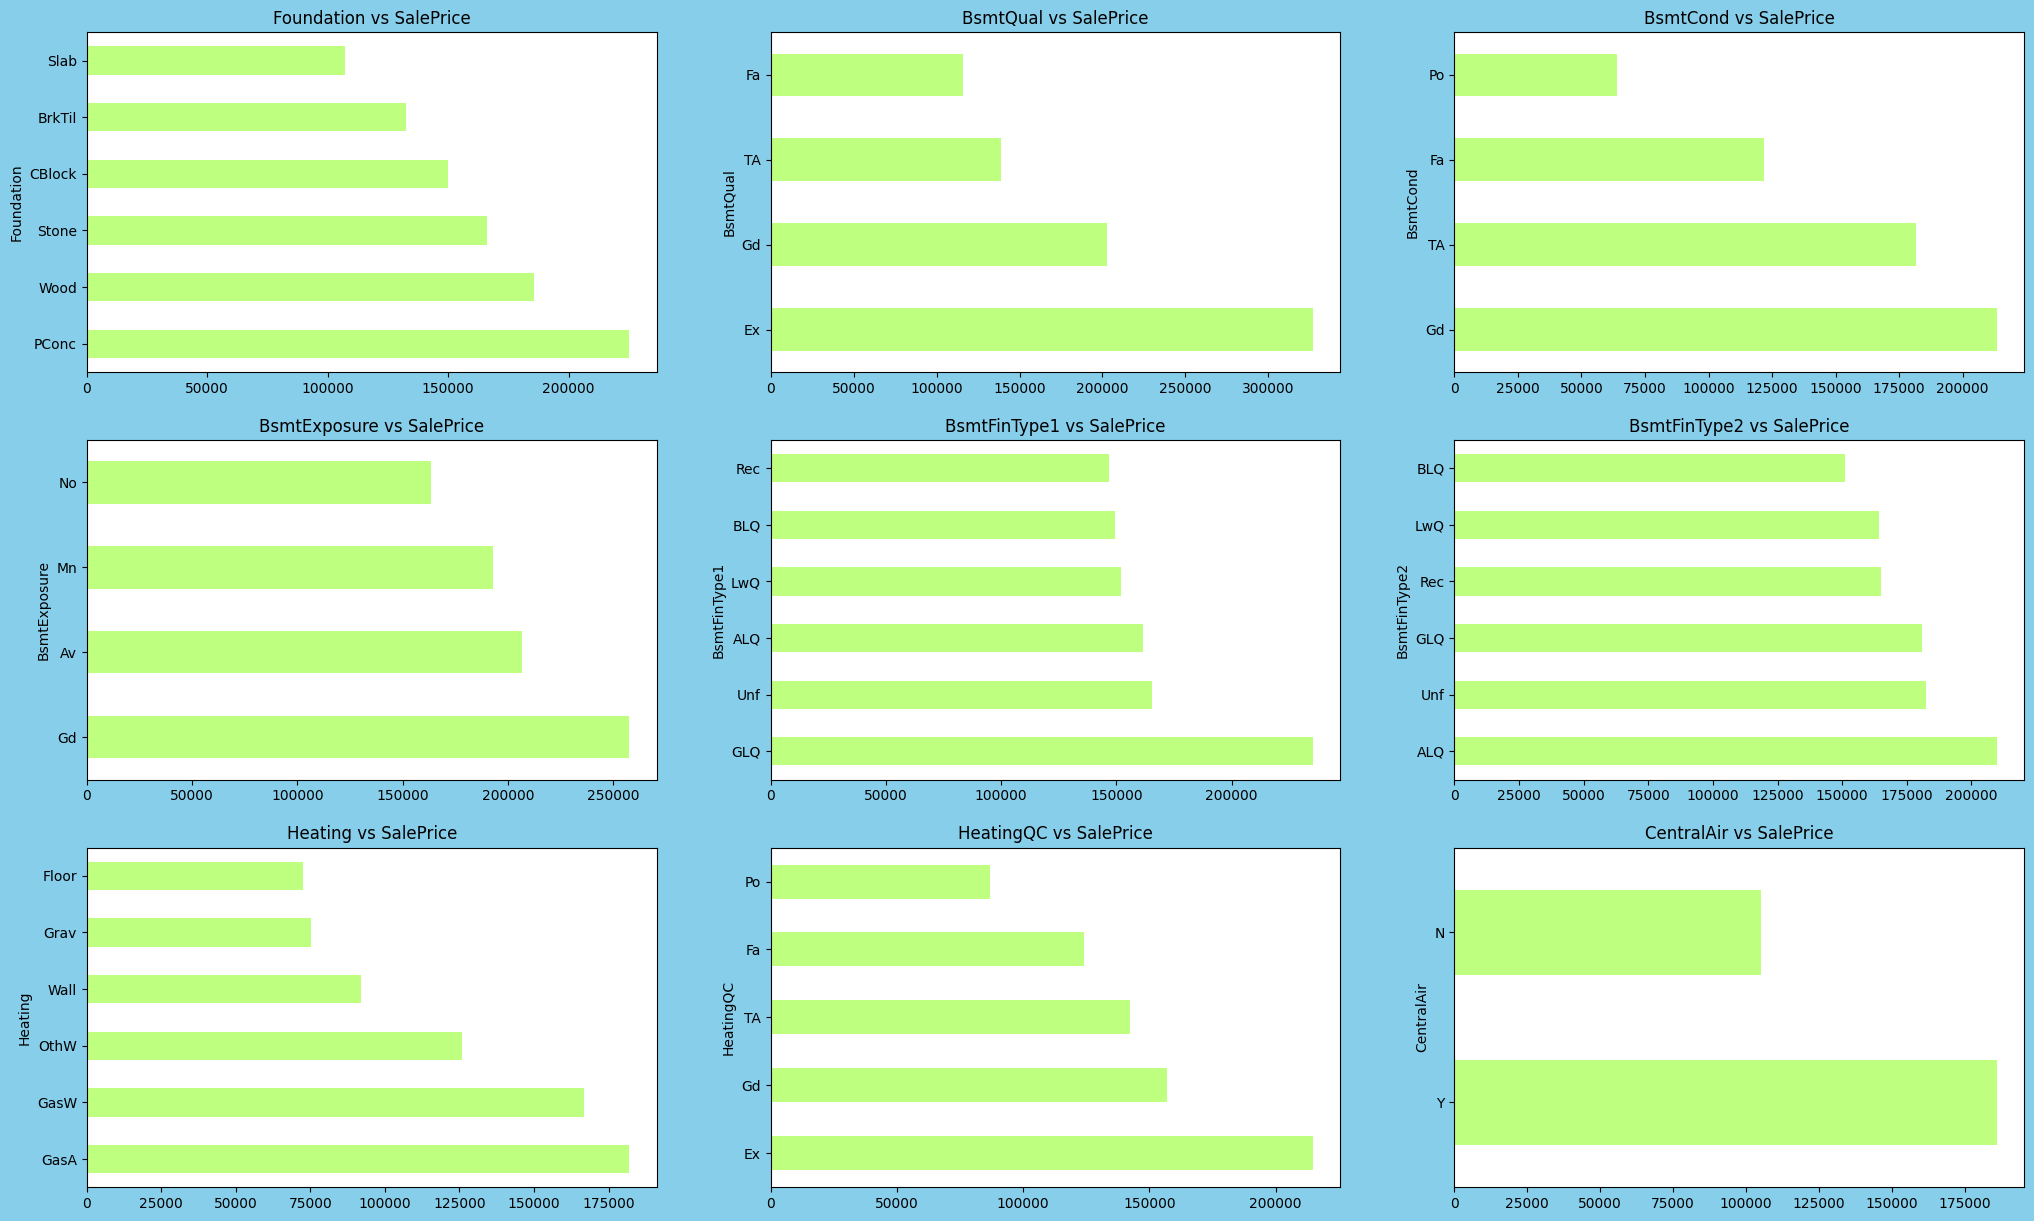

In [16]:
fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(25,15), facecolor='skyblue')
plot_fig(categorical_columns[18:21],0)
plot_fig(categorical_columns[21:24],1)
plot_fig(categorical_columns[24:27],2)
plt.show()

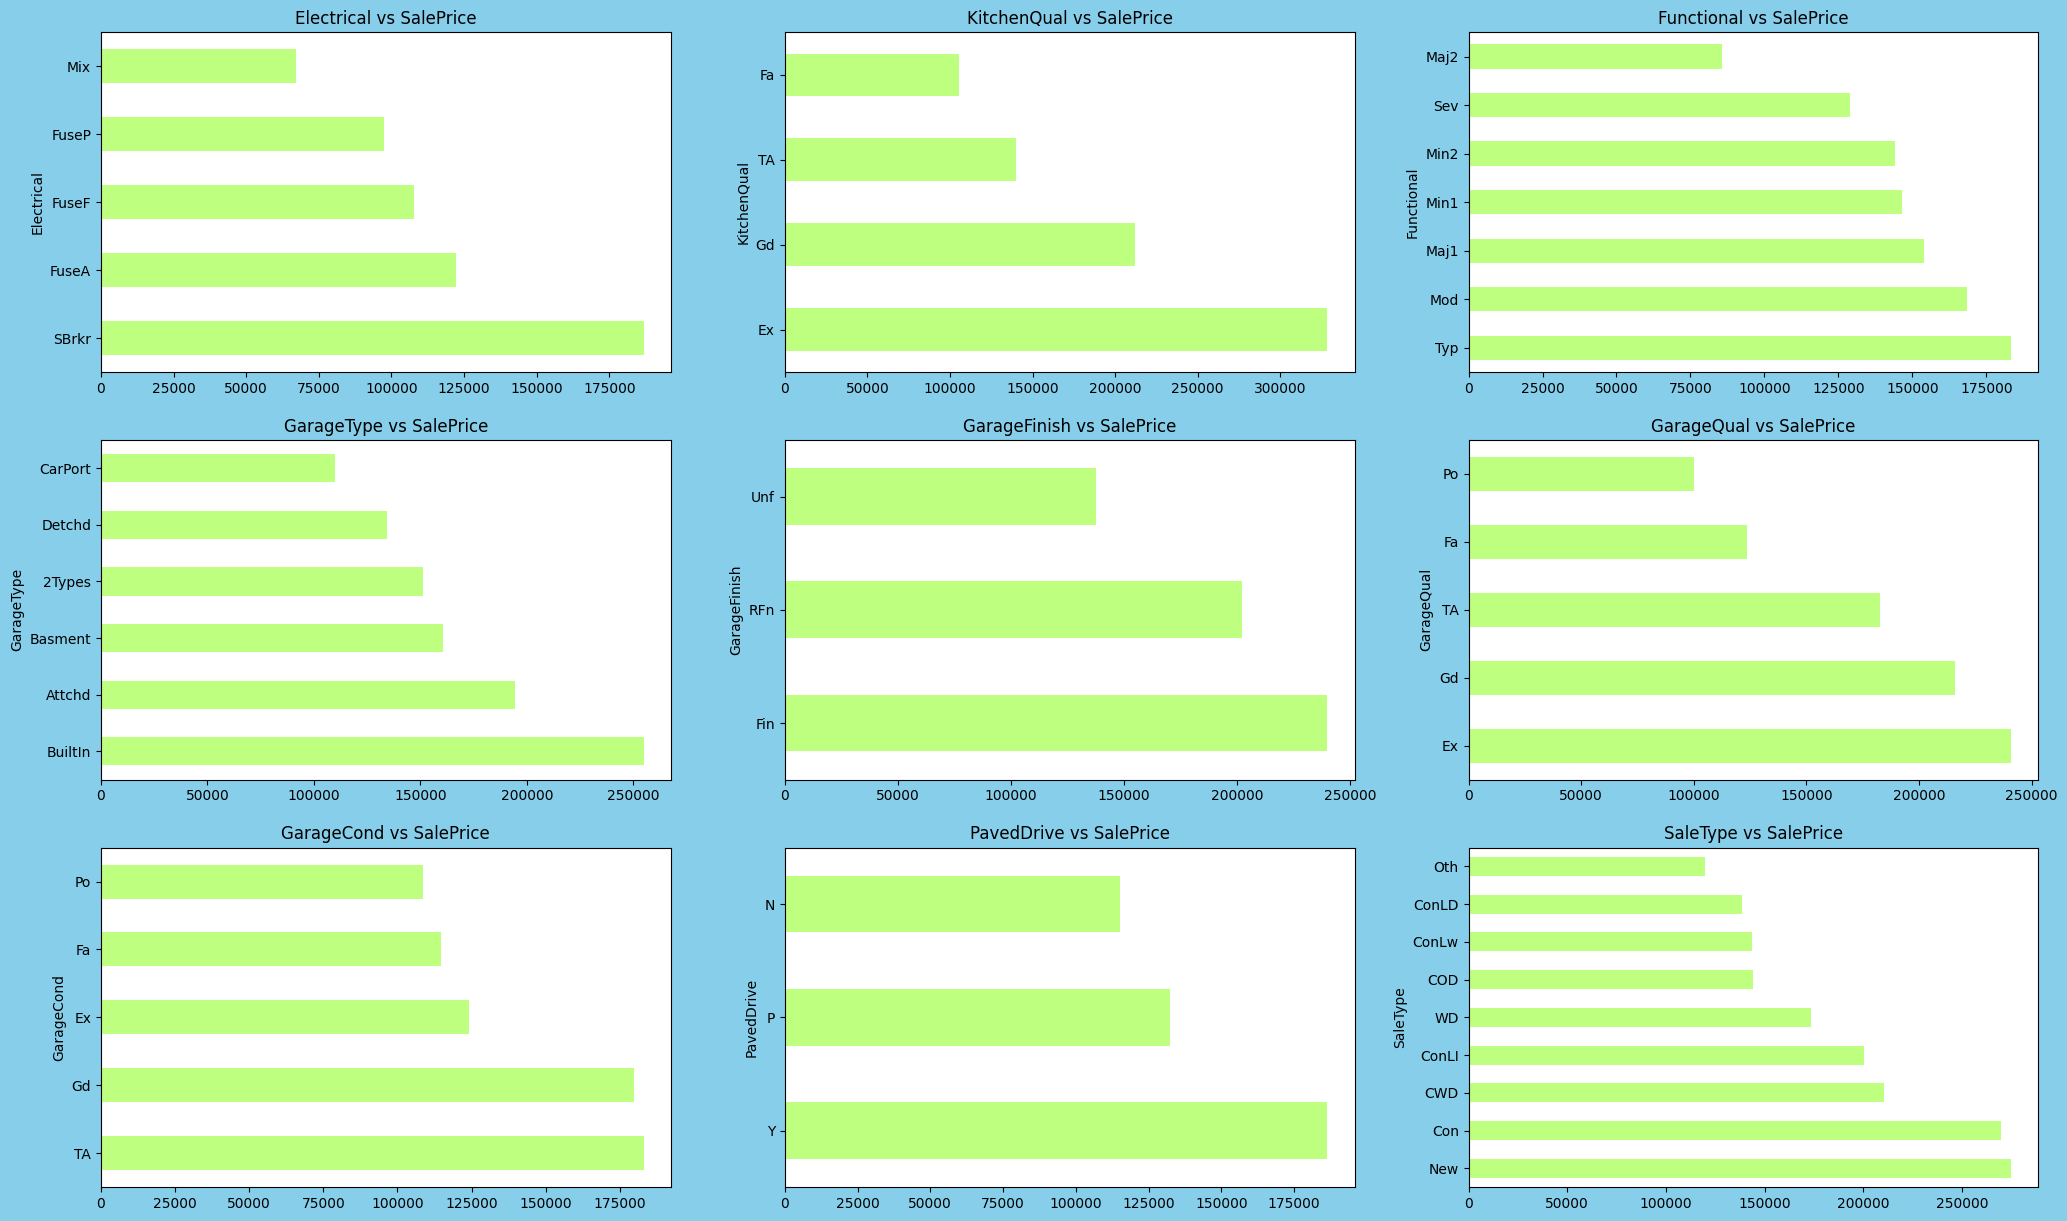

In [17]:
fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(25,15), facecolor='skyblue')
plot_fig(categorical_columns[27:30],0)
plot_fig(categorical_columns[30:33],1)
plot_fig(categorical_columns[33:36],2)
plt.show()

From the above figures we can see that all the categorical columns are playing some roles for predicting sale price. There are four columns I think not very helpful after visualization. Columns LotConfig, LandSlop, BsmtFinType1, BsmtFinType2.

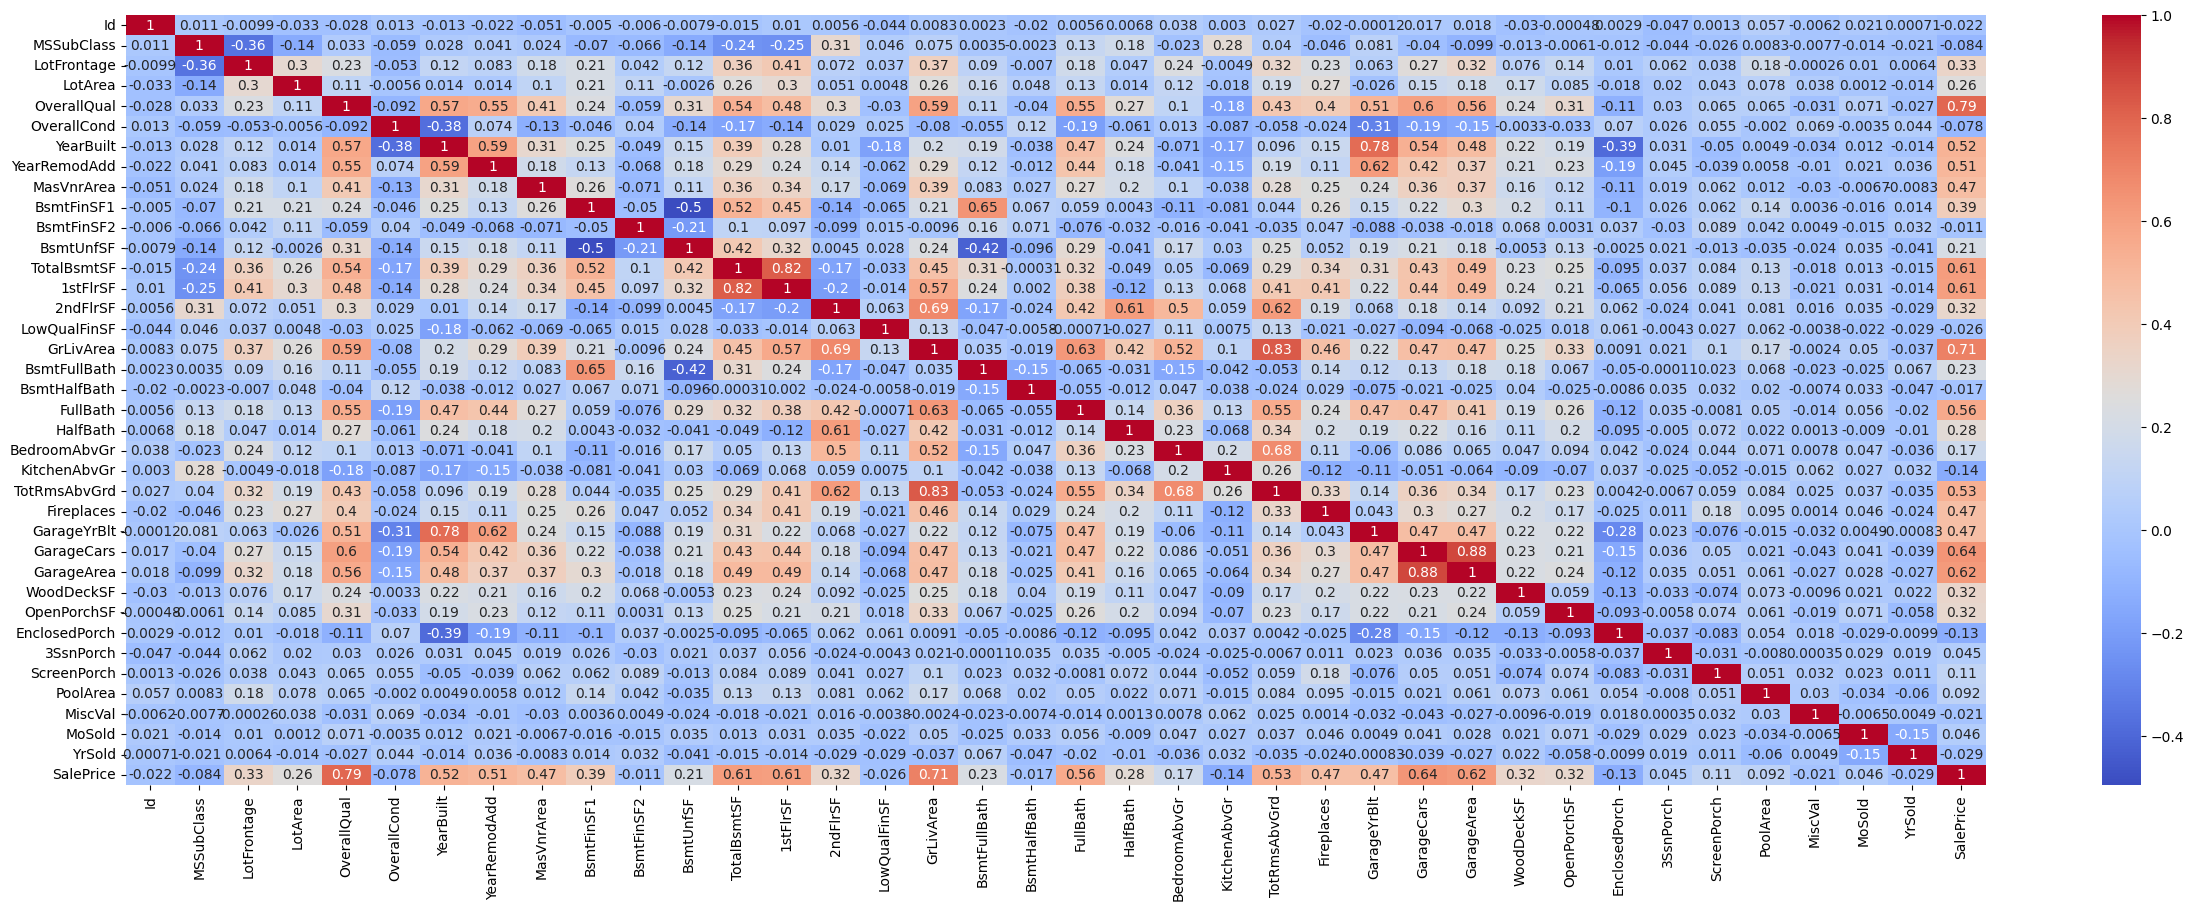

In [18]:
corr = df_copy[df_copy.describe().columns].corr()
plt.figure(figsize=(30,10))
sns.heatmap(corr,annot=True, cmap='coolwarm')
plt.show()

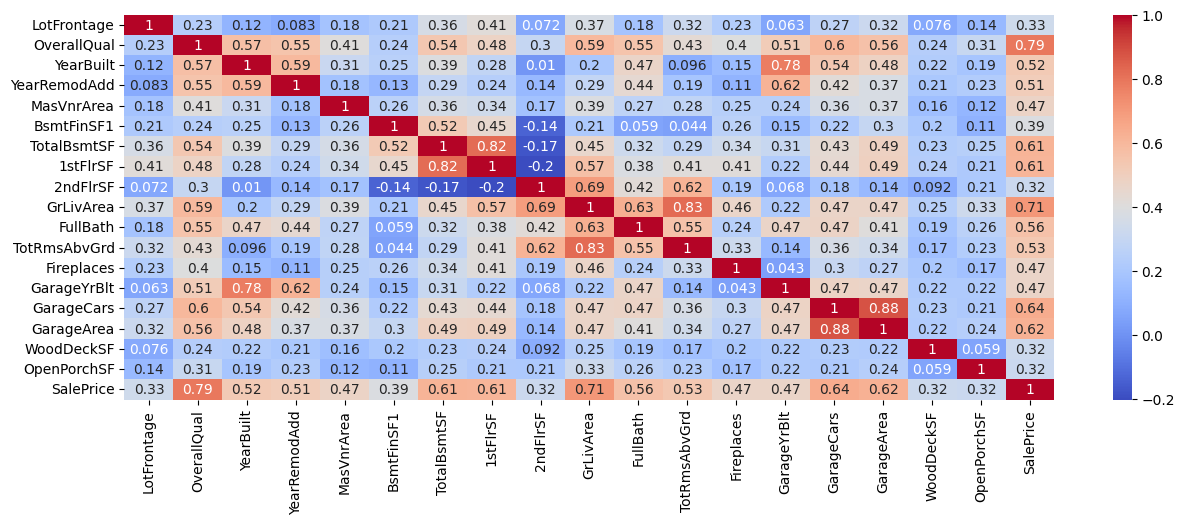

In [19]:
cols = corr[(corr['SalePrice']> 0.3)].index # choosing those columns which are highly correlated with target variable
corr2 = df_copy[cols].corr()
plt.figure(figsize=(15,5))
sns.heatmap(corr2, annot=True, cmap='coolwarm')
plt.show()

1. OverallQuall is 79% correlated with target variable.

data preprocessed successfully!


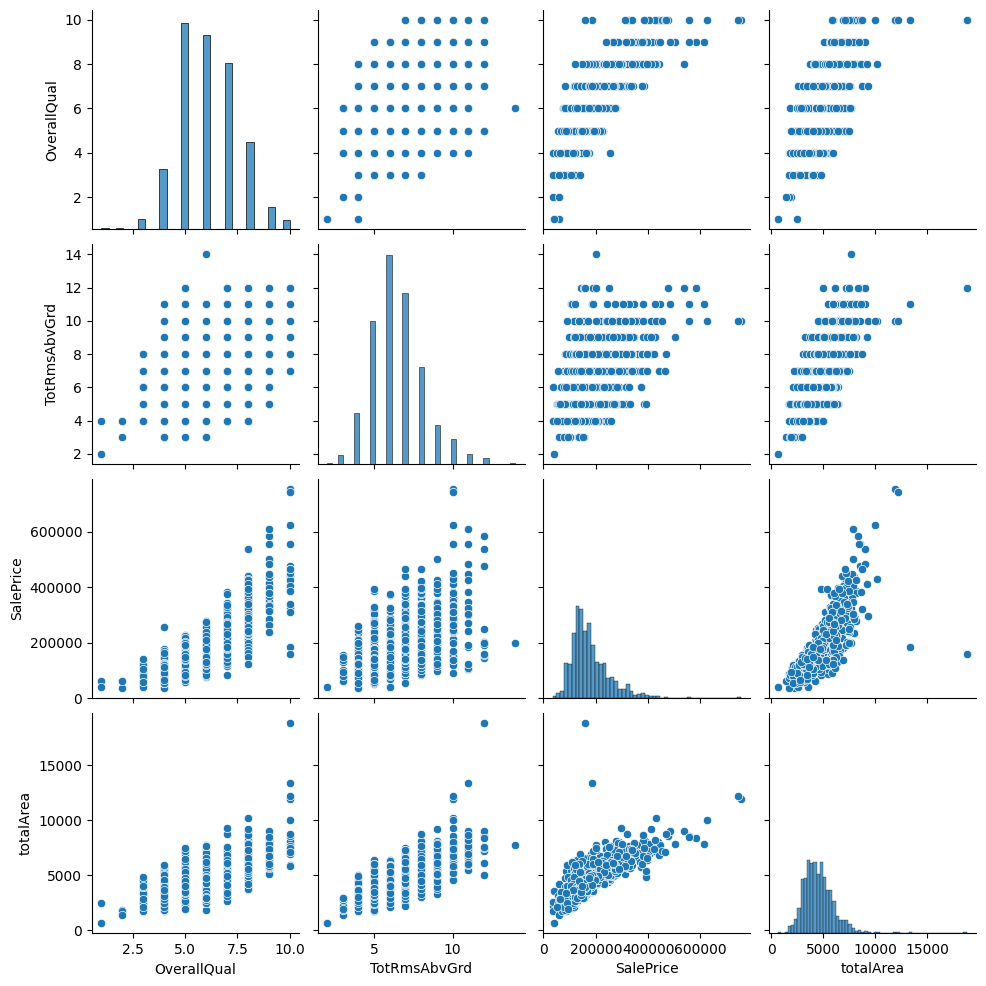

In [20]:
df_copy = preprocessingThree(df_train.copy()) # making df ready for eda
df_copy.describe().columns
dum = df_copy[['OverallQual', 'TotRmsAbvGrd', 'SalePrice','totalArea']]
sns.pairplot(dum)
plt.show()

These are the columns highly correlated with Sale.  But There is problem they are also correlated with each other therefore we need to eliminate few of them.
All the above features are highly correlated with totalArea I decided to keep only totalArea.

In [21]:
def preprocessingFour(df, isTrain=1):
  if isTrain == 1:
    good_features = ['totalArea', 'SalePrice']
  else:
    good_features = ['totalArea']
  df = preprocessingThree(df)
  categorical_features = list(df.describe(include='object').columns)
  good_features.extend(categorical_features)
  df = df[good_features]
  df = pd.get_dummies(df, columns=categorical_features, drop_first=True, dtype=int) # Encoding categorical variables
  return df

In [22]:
df_copy = df_train.copy()
df_copy = preprocessingFour(df_copy)
cols_to_be_drop = set(df_copy.columns) - set(preprocessingFour( df_test.copy(), isTrain=0).columns)
sales = df_copy['SalePrice']
# df_copy.drop('SalePrice', axis=1, inplace=True)
df_copy.drop(cols_to_be_drop, axis=1, inplace=True)
df_copy['SalePrice'] = sales

data preprocessed successfully!
data preprocessed successfully!


In [23]:
df_copy.shape

(1460, 179)

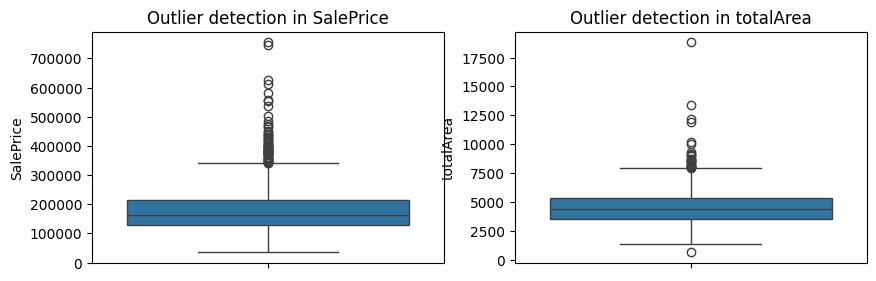

SalePrice
q1:  129975.0
q3:  214000.0
iqr:  84025.0
lower:  3937.5
upper:  340037.5

totalArea
q1:  3552.0
q3:  5324.5
iqr:  1772.5
lower:  893.25
upper:  7983.25


In [24]:
# Outlier treatment
def treatOutliers(df,col):
  q1 = df[col].quantile(.25)
  q3 = df[col].quantile(.75)
  iqr = q3-q1
  lower_bound = q1 - 1.5*iqr
  upper_bound = q3 + 1.5*iqr
  print(col)
  print('q1: ',q1)
  print('q3: ',q3)
  print('iqr: ',iqr)
  print('lower: ',lower_bound)
  print('upper: ',upper_bound)
  # # df = df[(df[col] > lower_bound) & (df[col] < upper_bound)]
  # # Since we have limited data therefore I don't want to drop that's why I am using capping technique to treat outliers
  # max = df[col].max()
  # min = df[col].min()
  df[col] = np.where(df[col] > upper_bound, upper_bound, df[col])
  df[col] = np.where(df[col] < lower_bound, lower_bound, df[col])
  return df

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10,3))
sns.boxplot(df_copy['SalePrice'], ax=ax[0])
sns.boxplot(df_copy['totalArea'], ax=ax[1])
ax[0].set_title('Outlier detection in SalePrice')
ax[1].set_title('Outlier detection in totalArea')
plt.show()
df_copy = treatOutliers(df_copy.copy(), 'SalePrice')
print()
df_copy = treatOutliers(df_copy.copy(), 'totalArea')

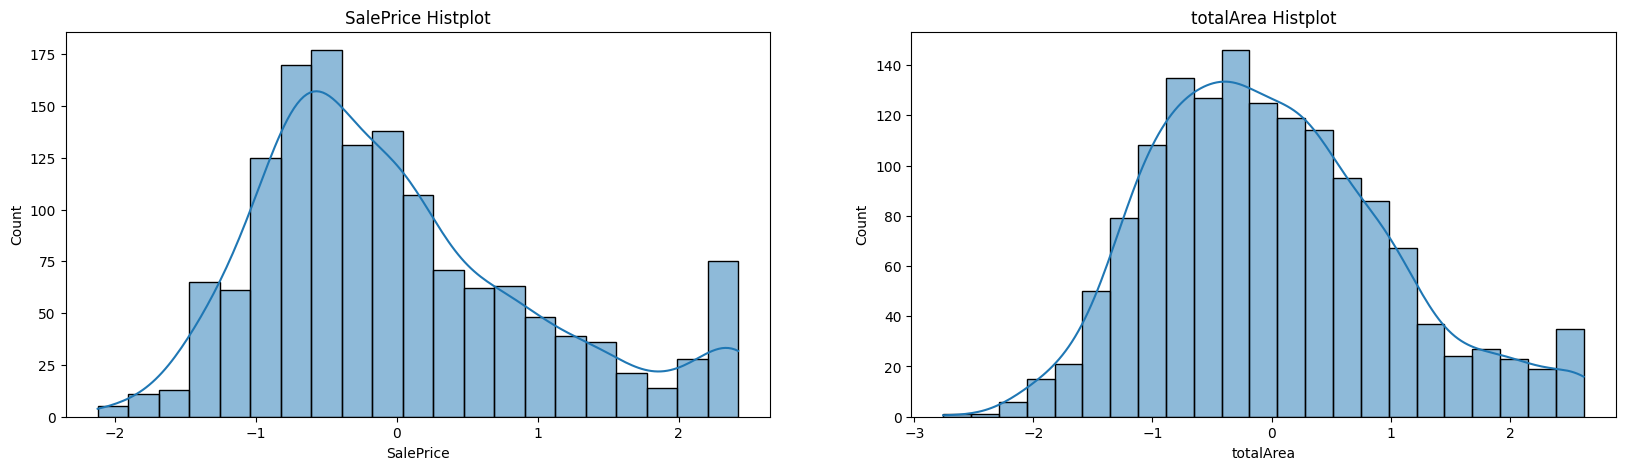

In [25]:
# Data Scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20,5))
df_copy['SalePrice'] = scaler.fit_transform(df_copy[['SalePrice']])
df_copy['totalArea'] = scaler.fit_transform(df_copy[['totalArea']])
sns.histplot(df_copy['SalePrice'], kde=True, ax=ax[0])
sns.histplot(df_copy['totalArea'], kde=True, ax=ax[1])
ax[0].set_title('SalePrice Histplot')
ax[1].set_title('totalArea Histplot')
plt.show()

In [26]:
# Dimentionality reduction
X = df_copy.drop('SalePrice', axis=1)
y = df_copy['SalePrice']
pca = PCA(n_components=80)
X_pca = pca.fit_transform(X)
pca.explained_variance_ratio_.sum()

0.9556668161813726

After performing PCA we observed that less than 100 pca can describe more than 90% of variance therefore I decided to select 3 features for model building.

In [27]:
# split the data for train and test.
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

### RandomForest Regressor

In [28]:
# RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
randomForestModel = RandomForestRegressor(n_estimators=200, random_state=42, n_jobs=-1) # Random Forest object creation
# randomForestModel = DecisionTreeRegressor() # Random Forest object creation
randomForestModel.fit(X_train, y_train) # model fitting
y_pred = randomForestModel.predict(X_test) # making prediction for test data
pred_train = randomForestModel.predict(X_train) # making prediction for train data

In [29]:
# Scores
mse_test = mean_squared_error(y_test, y_pred)
mse_train = mean_squared_error(y_train, pred_train)

test_r2 = r2_score(y_test, y_pred)
train_r2 = r2_score(y_train, pred_train)

print('Test R-squared:', test_r2)
print('R-squared:', train_r2)
print()
print('Test Mean Squared Error:', mse_test)
print('Train Mean Squared Error:', mse_train)

Test R-squared: 0.8814108425471763
R-squared: 0.980278175098607

Test Mean Squared Error: 0.1284608568641523
Train Mean Squared Error: 0.01929531280144808


the model is overfit.

#### Decision Tree

In [30]:
# RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor() # Random Forest object creation
dtr.fit(X_train, y_train) # model fitting
y_pred = dtr.predict(X_test) # making prediction for test data
pred_train = dtr.predict(X_train) # making prediction for train data

In [31]:
# Scores
mse_test = mean_squared_error(y_test, y_pred)
mse_train = mean_squared_error(y_train, pred_train)

test_r2 = r2_score(y_test, y_pred)
train_r2 = r2_score(y_train, pred_train)

print('Test R-squared:', test_r2)
print('R-squared:', train_r2)
print()
print('Test Mean Squared Error:', mse_test)
print('Train Mean Squared Error:', mse_train)

Test R-squared: 0.7090427759892423
R-squared: 0.9999540801730643

Test Mean Squared Error: 0.31517733248173163
Train Mean Squared Error: 4.492674633015308e-05


In [32]:
from sklearn.model_selection import GridSearchCV
grid_param = {'max_depth':np.arange(1,4,1)}
grid_search = GridSearchCV(estimator=dtr, param_grid=grid_param, cv=5)
grid_search.fit(X_train, y_train)
best_dtr = grid_search.best_estimator_

y_pred = best_dtr.predict(X_test) # making prediction for test data
pred_train = best_dtr.predict(X_train) # making prediction for train data

In [33]:
# Scores
mse_test = mean_squared_error(y_test, y_pred)
mse_train = mean_squared_error(y_train, pred_train)

test_r2 = r2_score(y_test, y_pred)
train_r2 = r2_score(y_train, pred_train)

print('Test R-squared:', test_r2)
print('Train R-squared:', train_r2)
print()
print('Test Mean Squared Error:', mse_test)
print('Train Mean Squared Error:', mse_train)

Test R-squared: 0.7898350716766048
Train R-squared: 0.7851057378981295

Test Mean Squared Error: 0.2276596558665714
Train Mean Squared Error: 0.21024687254976615


Earlier our decision tree model was overfit but after performing cross validation our model is generalised. The model can be imroved more.

In [34]:
# prediction of unseen data
unseen_data = preprocessingFour( df_test.copy(), isTrain=0) # data preprocessing
unseen_data['totalArea'] = scaler.transform(unseen_data[['totalArea']]) # data scaling
pca_unseen = pca.transform(unseen_data[X.columns]) # dimention reduction
predictions = best_dtr.predict(pca_unseen) # prediction
predictions = scaler.inverse_transform(predictions.reshape(-1,1)) # inverse transformation to make in original form.
df_test['prediction'] = [round(i,2) for i in predictions.flatten()] # adding prediction to the test data

data preprocessed successfully!


In [35]:
df_test.head(3)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,prediction
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,3525.93
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,4504.36
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,5372.09
